<a href="https://colab.research.google.com/github/piyush0511/Deep-Learning-Paper-Implementations/blob/master/unet_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd

In [2]:
def crop_image(in_image,out_image):
    input_shape = in_image.shape[2]
    out_shape = out_image.shape[2]
    delta = (input_shape - out_shape)//2
    return in_image[:,delta:input_shape-delta,delta:input_shape-delta,:]

In [3]:
def down_conv(a):
    model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(a, (3,3)),
    # The second convolution
    tf.keras.layers.Conv2D(a, (3,3), activation='relu')]
    )
    return model

In [4]:
def up_conv(f,a,b):
    x = tf.keras.layers.UpSampling2D(size = (2,2))(a)
    x = tf.keras.layers.Conv2D(f, (3,3), padding = "same", activation='relu')(x)
    y = crop_image(b,x)
    x = tf.keras.layers.Concatenate(axis=3)([x, y])
    x = down_conv(f)(x)
    
    return x

In [5]:
img_inputs = tf.keras.Input(shape=(572, 572, 3))
x1 = down_conv(64)(img_inputs)
x2 = tf.keras.layers.MaxPooling2D(2,2)(x1)
x3 = down_conv(128)(x2)
x4 = tf.keras.layers.MaxPooling2D(2,2)(x3)
x5 = down_conv(256)(x4)
x6 = tf.keras.layers.MaxPooling2D(2,2)(x5)
x7 = down_conv(512)(x6)
x8 = tf.keras.layers.MaxPooling2D(2,2)(x7)
x9 = down_conv(1024)(x8)
x = up_conv(512,x9,x7)
x = up_conv(256,x,x5)
x = up_conv(128,x,x3)
x = up_conv(64,x,x1)
output = tf.keras.layers.Conv2D(3, (1,1), activation='relu')(x)

In [6]:
model = tf.keras.Model(inputs=img_inputs, outputs=output, name="Unet")





In [7]:
model.summary()

Model: "Unet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 572, 572, 3) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 568, 568, 64) 38720       input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 284, 284, 64) 0           sequential[0][0]                 
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 280, 280, 128 221440      max_pooling2d[0][0]              
_______________________________________________________________________________________________

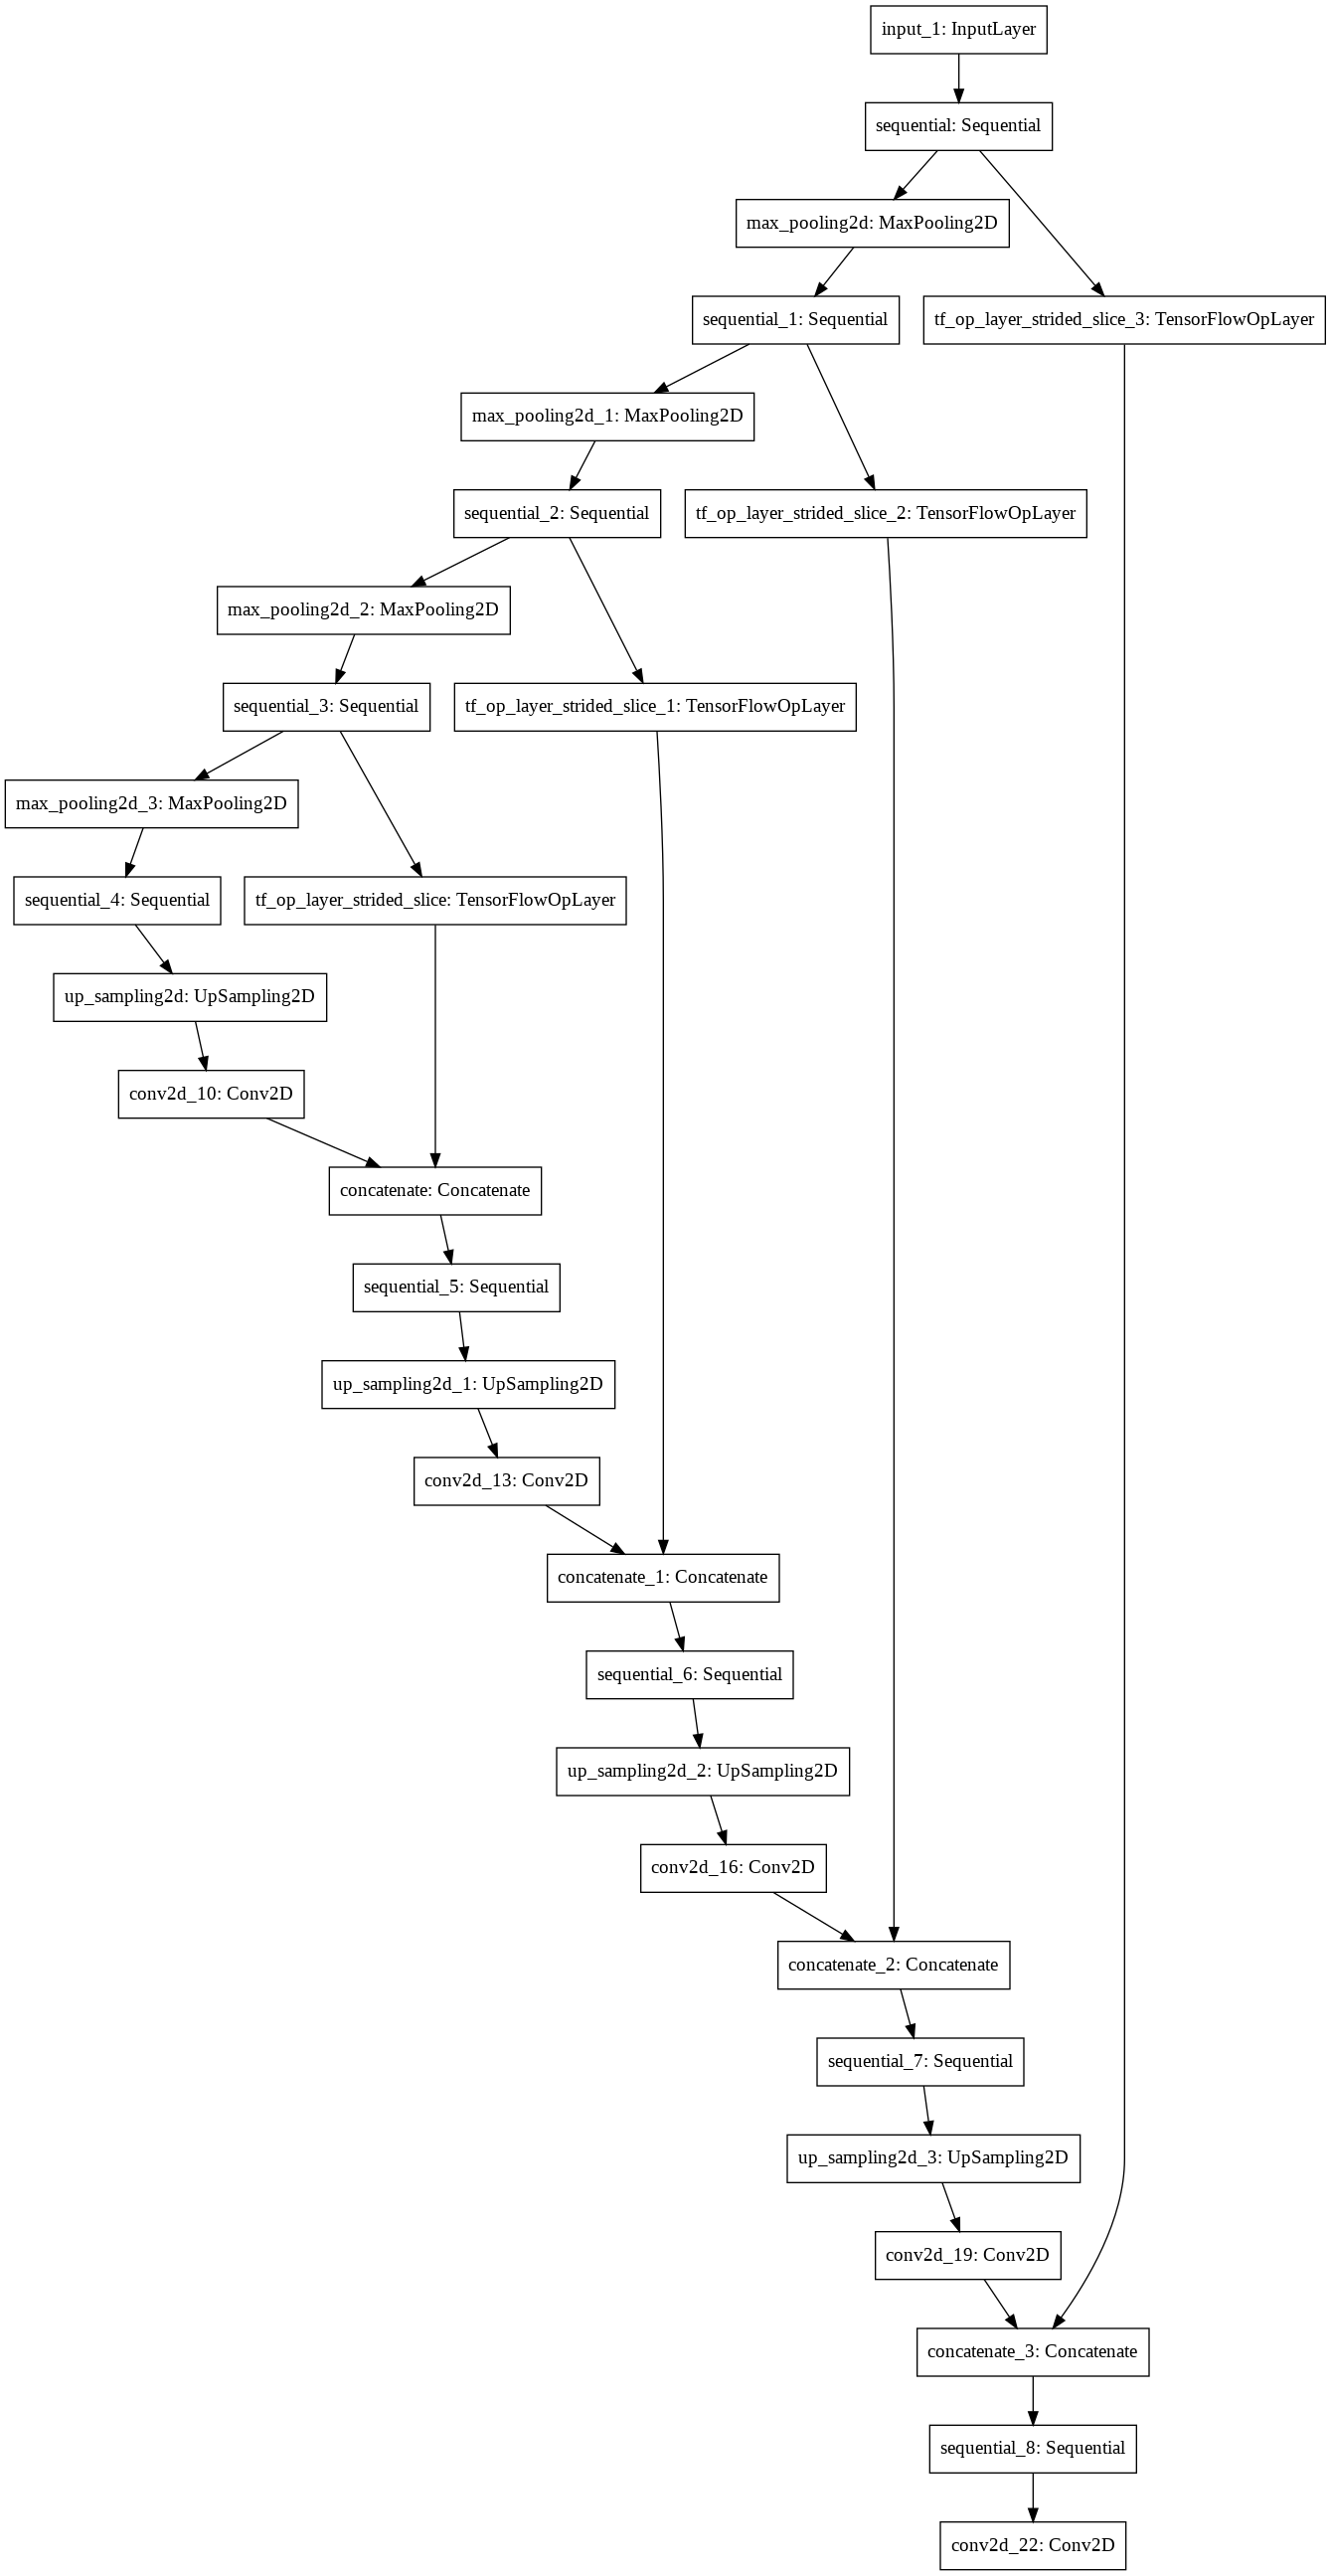

In [9]:
tf.keras.utils.plot_model(model, "my_first_model.png")
